In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
ad_data = pd.read_csv("advertising.csv")
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [15]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [16]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


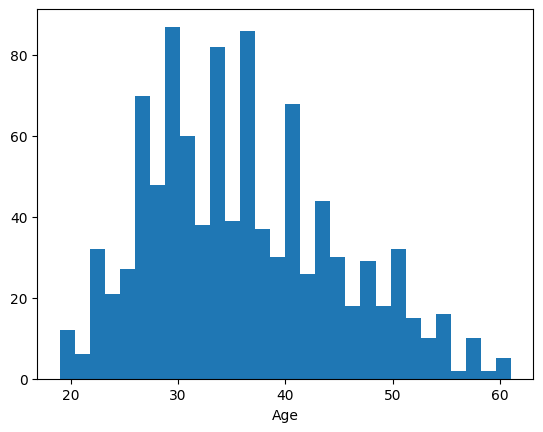

In [26]:
plt.hist(ad_data['Age'], bins=30)
plt.xlabel('Age')
plt.show()

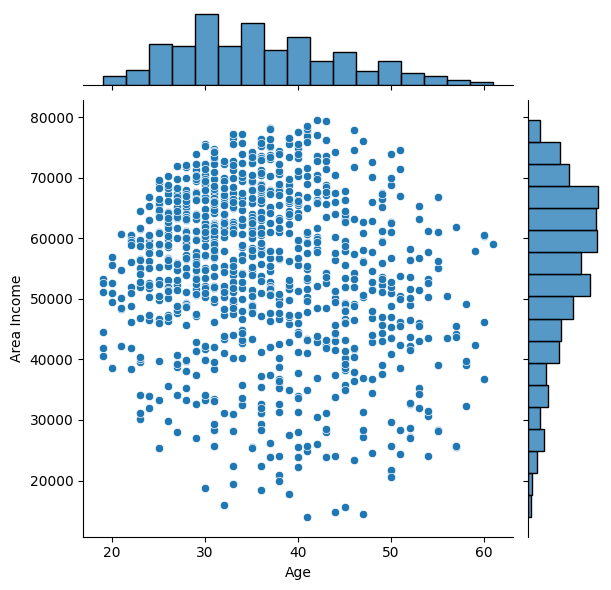

In [28]:
sns.jointplot(x='Age', y='Area Income', data=ad_data)

plt.show()

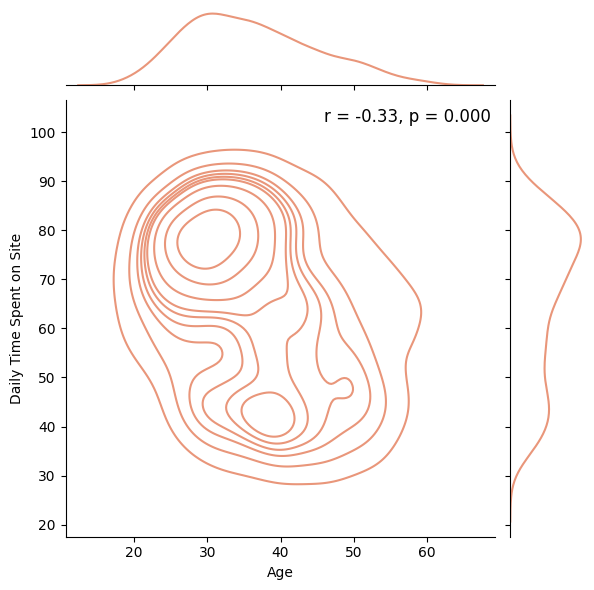

In [92]:
import scipy.stats as stats

jp = sns.jointplot(x='Age', y='Daily Time Spent on Site', data=ad_data, kind='kde',color="#E9967A")

r, p = stats.pearsonr(ad_data['Age'], ad_data['Daily Time Spent on Site'])

text = f"r = {r:.2f}, p = {p:.3f}"

jp.ax_joint.annotate(text, xy=(0.60, 0.95), xycoords='axes fraction', fontsize=12)

plt.show()

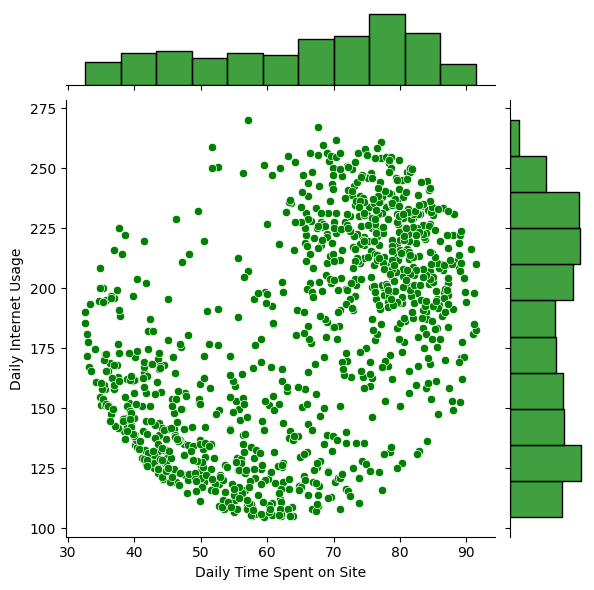

In [65]:
sns.jointplot(x='Daily Time Spent on Site', y='Daily Internet Usage', data=ad_data,color="g")

plt.show()

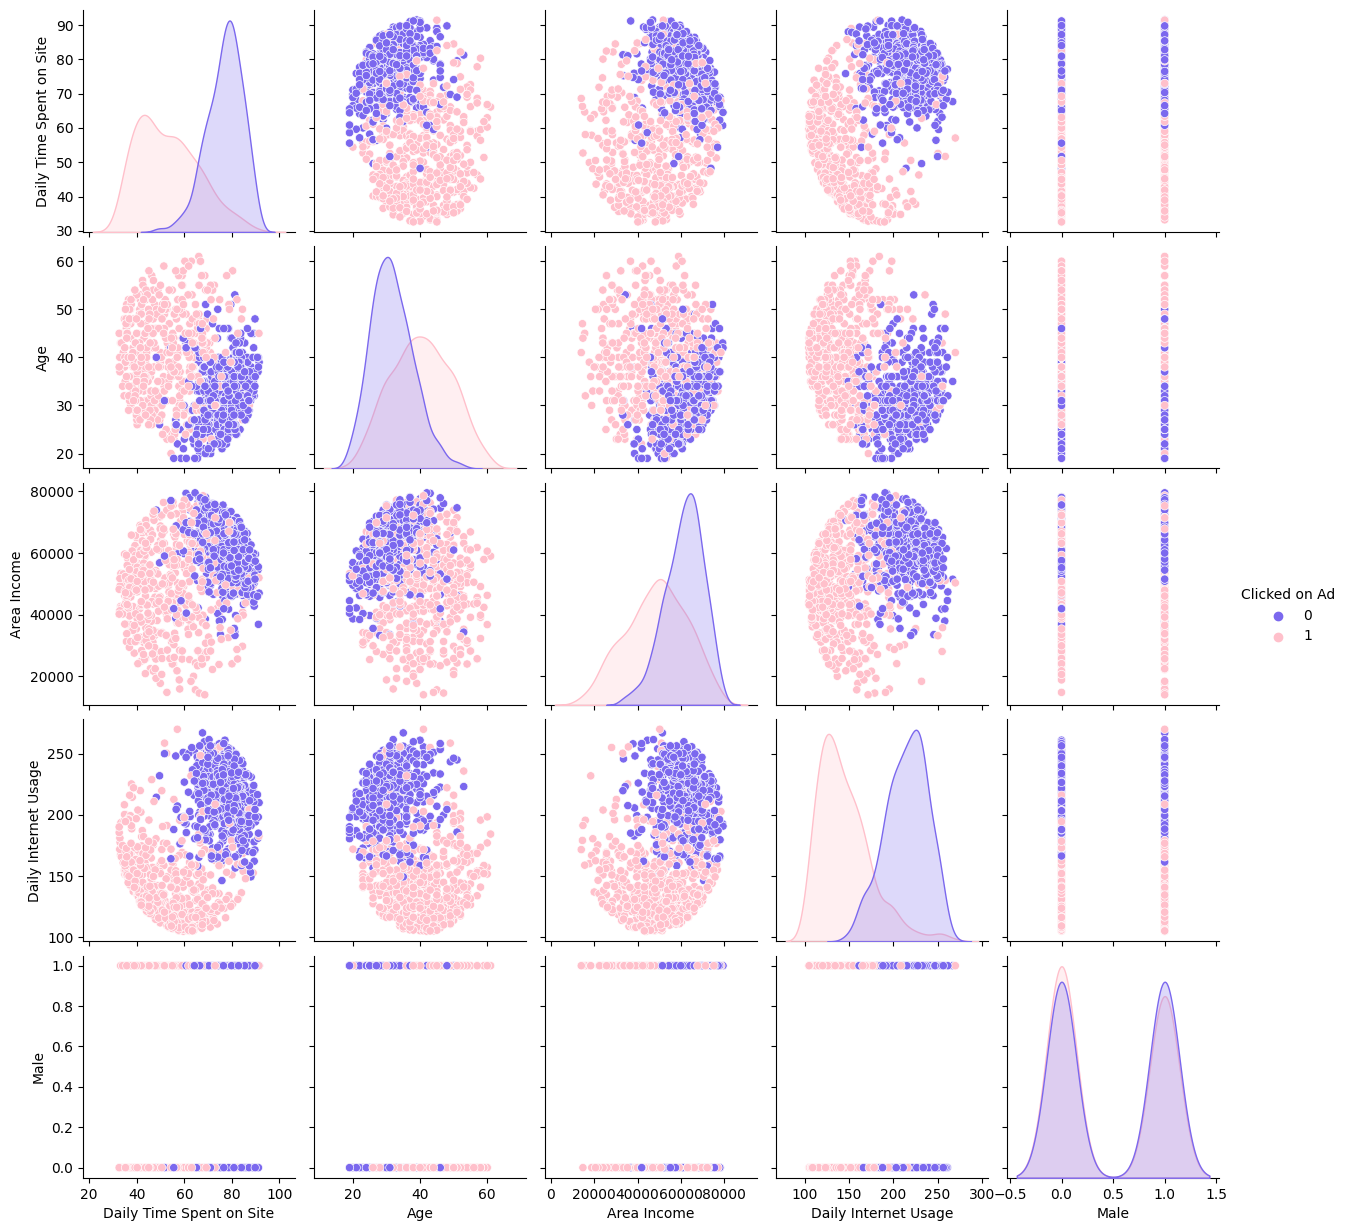

In [63]:
colors = ["mediumslateblue", "pink"]
sns.pairplot(ad_data, hue='Clicked on Ad',palette=colors)

plt.show()

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [53]:
X = ad_data[ ["Area Income","Daily Internet Usage"] ]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Area Income           1000 non-null   float64
 1   Daily Internet Usage  1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [52]:
y = ad_data["Clicked on Ad"]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Clicked on Ad, dtype: int64

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=101)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 290 to 863
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Area Income           700 non-null    float64
 1   Daily Internet Usage  700 non-null    float64
dtypes: float64(2)
memory usage: 16.4 KB


In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd

In [59]:
logreg = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [58]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.85      0.75       157
           1       0.76      0.54      0.63       143

    accuracy                           0.70       300
   macro avg       0.72      0.69      0.69       300
weighted avg       0.71      0.70      0.69       300

